In [1]:
import sklearn.datasets
import numpy as np
import pandas as pd

In [2]:
breast_cancer = sklearn.datasets.load_breast_cancer()

In [ ]:
breast_cancer

{'DESCR': '.. _breast_cancer_dataset:\n\nBreast cancer wisconsin (diagnostic) dataset\n--------------------------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 569\n\n    :Number of Attributes: 30 numeric, predictive attributes and the class\n\n    :Attribute Information:\n        - radius (mean of distances from center to points on the perimeter)\n        - texture (standard deviation of gray-scale values)\n        - perimeter\n        - area\n        - smoothness (local variation in radius lengths)\n        - compactness (perimeter^2 / area - 1.0)\n        - concavity (severity of concave portions of the contour)\n        - concave points (number of concave portions of the contour)\n        - symmetry \n        - fractal dimension ("coastline approximation" - 1)\n\n        The mean, standard error, and "worst" or largest (mean of the three\n        largest values) of these features were computed for each image,\n        resulting in 30 features.  For

In [3]:
X = breast_cancer.data
y = breast_cancer.target

In [ ]:
X.shape,y.shape

((569, 30), (569,))

In [5]:
data = pd.DataFrame(breast_cancer.data, columns=breast_cancer.feature_names)
data['class'] = breast_cancer.target

In [ ]:
data.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,class
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [8]:
data['class'].value_counts()

1    357
0    212
Name: class, dtype: int64

In [ ]:
breast_cancer.target_names

array(['malignant', 'benign'], dtype='<U9')

In [10]:
data.groupby('class').mean()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
class,,,,,,,,,,,,,,,,,,,,,
0,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,0.062680,...,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530
1,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,0.062867,...,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442


### Train test split

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = data.drop('class',axis=1)
y = data['class']

 In certain cases after splitting there might be improper representation of a particular class. For example let's assume that 65% of the dataset contains 1 and the 35% of the dataset contains 0. After splitting the train and test split must also reflect more or less the same representation. The representation shouldn't be random. For that case we use ***stratify***  

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, stratify = y, random_state=42)

In [ ]:
y.mean(), y_train.mean(), y_test.mean() 

(0.6274165202108963, 0.626953125, 0.631578947368421)

### Binarisation of inputs

MP Neuron model accepts only binary values as input so we need to convert all the values into either 1 or 0.

In [ ]:
import matplotlib.pyplot as plt

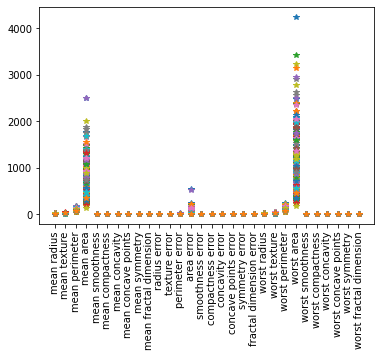

In [ ]:
plt.plot(X_train.T,"*")
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
X_binarised_3_train = X_train['mean area'].map(lambda x : 0 if x < 1000 else 1)

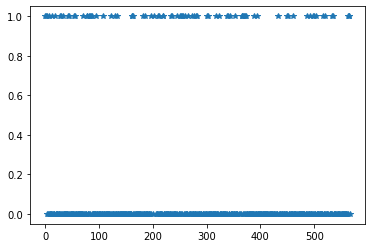

In [ ]:
plt.plot(X_binarised_3_train,"*")
plt.show()

Put all the datapoints in one of the 2 bins

In [ ]:
X_binarised_train = X_train.apply(pd.cut, bins = 2, labels=[0,1])

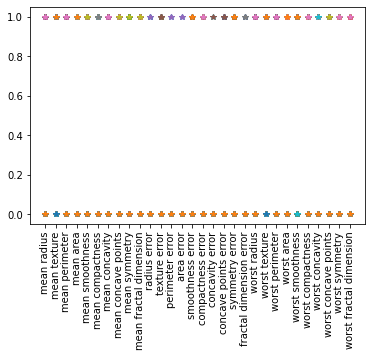

In [ ]:
plt.plot(X_binarised_train.T,"*")
plt.xticks(rotation="vertical")
plt.show()

In [ ]:
X_binarised_test = X_test.apply(pd.cut, bins=2 , labels=[0,1])

In [ ]:
X_binarised_test = X_binarised_test.values
X_binarised_train = X_binarised_train.values

MP Neuron Model -  McCulloch-Pitts Neuron Model

b is the only parameter and it is the threshold for classification. If the result from the model is greater than b then the record is classified as 1 else 0.



In [ ]:
from random import randint

In [ ]:
b = 3
i = randint(0, X_binarised_train.shape[0])
print("For row", i)

if(np.sum(X_binarised_train[i,:]) >= b):
  print("MP neuron inference is malignant")
else:
  print("MP neuron inference is benign")

# We do this to compare the predicted value with the observed values
if(y_train[i] == 1):
  print("Ground truth is malignant")
else:
  print("Ground truth is benign")

For row 106
MP neuron inference is benign
Ground truth is malignant


In [ ]:
b = 40
y_pred_train = []
accurate_rows = 0

for x, y in zip(X_binarised_train,y_train):
  y_pred = (np.sum(x) >= b)
  y_pred_train.append(y_pred)
  result = (y == y_pred)
  if(result):
    accurate_rows += 1

print("Number of accurate rows is ",accurate_rows)
print("Accuracy is", accurate_rows/X_binarised_train.shape[0])

Number of accurate rows is  191
Accuracy is 0.373046875


In [ ]:
for b in range(X_binarised_train.shape[1]+1):
  y_pred_train = [] 
  accurate_rows = 0
  for x, y in zip(X_binarised_train,y_train):
    y_pred = (np.sum(x) >= b)
    y_pred_train.append(y_pred)
    result = (y == y_pred)
    if(result):
      accurate_rows += 1

  print(b,"Accuracy is", accurate_rows/X_binarised_train.shape[0])

0 Accuracy is 0.626953125
1 Accuracy is 0.28125
2 Accuracy is 0.19140625
3 Accuracy is 0.1484375
4 Accuracy is 0.138671875
5 Accuracy is 0.169921875
6 Accuracy is 0.197265625
7 Accuracy is 0.224609375
8 Accuracy is 0.259765625
9 Accuracy is 0.287109375
10 Accuracy is 0.3046875
11 Accuracy is 0.322265625
12 Accuracy is 0.3359375
13 Accuracy is 0.337890625
14 Accuracy is 0.34765625
15 Accuracy is 0.357421875
16 Accuracy is 0.361328125
17 Accuracy is 0.3671875
18 Accuracy is 0.37109375
19 Accuracy is 0.373046875
20 Accuracy is 0.373046875
21 Accuracy is 0.373046875
22 Accuracy is 0.373046875
23 Accuracy is 0.373046875
24 Accuracy is 0.373046875
25 Accuracy is 0.373046875
26 Accuracy is 0.373046875
27 Accuracy is 0.373046875
28 Accuracy is 0.373046875
29 Accuracy is 0.373046875
30 Accuracy is 0.373046875


From this we got very poor accuracy, this is because we have given larger values to be malignant(1) and smaller values to be benign(0). If we see the mean values after grouping by class we will find that benign has larger values. So we flip the numbers while binarising.

In [ ]:
X_binarised_train = X_train.apply(pd.cut, bins = 2, labels=[1,0])
X_binarised_train.shape

(512, 30)

In [ ]:
X_binarised_test = X_test.apply(pd.cut, bins=2 , labels=[1,0])

In [ ]:
X_binarised_test = X_binarised_test.values
X_binarised_train = X_binarised_train.values

In [ ]:
for b in range(X_binarised_train.shape[1]+1):
  y_pred_train = [] 
  accurate_rows = 0
  for x, y in zip(X_binarised_train,y_train):
    y_pred = (np.sum(x) >= b)
    y_pred_train.append(y_pred)
    result = (y == y_pred)
    if(result):
      accurate_rows += 1

  print(b,"Accuracy is", accurate_rows/X_binarised_train.shape[0])

0 Accuracy is 0.626953125
1 Accuracy is 0.626953125
2 Accuracy is 0.626953125
3 Accuracy is 0.626953125
4 Accuracy is 0.626953125
5 Accuracy is 0.626953125
6 Accuracy is 0.626953125
7 Accuracy is 0.626953125
8 Accuracy is 0.626953125
9 Accuracy is 0.626953125
10 Accuracy is 0.626953125
11 Accuracy is 0.626953125
12 Accuracy is 0.626953125
13 Accuracy is 0.62890625
14 Accuracy is 0.6328125
15 Accuracy is 0.638671875
16 Accuracy is 0.642578125
17 Accuracy is 0.65234375
18 Accuracy is 0.662109375
19 Accuracy is 0.6640625
20 Accuracy is 0.677734375
21 Accuracy is 0.6953125
22 Accuracy is 0.712890625
23 Accuracy is 0.740234375
24 Accuracy is 0.775390625
25 Accuracy is 0.802734375
26 Accuracy is 0.830078125
27 Accuracy is 0.861328125
28 Accuracy is 0.8515625
29 Accuracy is 0.80859375
30 Accuracy is 0.71875


In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
# We found the optimal value of b to be 27
b = 27
y_pred_test = []
for x in X_binarised_test:
  y_pred = (np.sum(x) >= b)
  y_pred_test.append(y_pred)
accuracy = accuracy_score(y_pred_test, y_test)
accuracy

0.8421052631578947

In [ ]:
class MPNeuron:
  def __init__(self):
    self.b = None

  def model(self,x):
    return (sum(x) >= self.b)
  
  def predict(self,X):
    y = []
    for x in X:
      result = self.model(x)
      y.append(result)
    return np.array(y)
  
  def fit(self,X,y):
    accuracy= {}
    for b in range(X.shape[1] + 1):
      self.b = b
      y_pred = self.predict(X)
      accuracy[b] = accuracy_score(y_pred, y)
    
    best_b = max(accuracy, key = accuracy.get)
    self.b = best_b

    print("Optimal value of b is",best_b)
    print("highest accuracy is",accuracy[best_b])

In [ ]:
mp_neuron = MPNeuron()
mp_neuron.fit(X_binarised_train, y_train)

Optimal value of b is 27
highest accuracy is 0.861328125


In [ ]:
y_test_pred = mp_neuron.predict(X_binarised_test)
accuracy = accuracy_score(y_test_pred, y_test)
accuracy

0.8421052631578947

In [ ]:
X_train = X_train.values
X_test = X_test.values

### Perceptron class 


$y = 1,if\sum_i w_i x_i >= b$

$y = 0, \mbox{otherwise}$


In [ ]:
class Perceptron:
  def __init__(self):
    self.w = None
    self.b = None
  
  def model(self,x):
    return 1 if (np.dot(self.w,x) >= self.b) else 0
  
  def predict(self,X):
    y = []
    for x in X:
      result = self.model(x)
      y.append(result)
    return np.array(y)
  
  def fit(self, X, y, epochs=1,lr=1):
    self.w = np.ones(X.shape[1])
    self.b = 0
    # accuracy = {}
    accuracy = []
    max_accuracy = 0

    wt_matrix = []

    for i in range(epochs):
      for x,j in zip(X,y):
        y_pred = self.model(x)
        if j == 1 and y_pred == 0:
          self.w = self.w + (lr * x)
          self.b = self.b + (lr * 1)
        elif j == 0 and y_pred == 1:
          self.w = self.w - (lr * x)
          self.b = self.b - (lr * 1)  
      wt_matrix.append(self.w)
      accuracy.append(accuracy_score(self.predict(X),y))
      if(accuracy[i] > max_accuracy):
        max_accuracy = accuracy[i]
        check_point_w = self.w
        check_point_b = self.b
    self.w = check_point_w
    self.b = check_point_b

    print(max_accuracy)
    plt.plot(accuracy)
    plt.ylim([0,1])
    plt.show()

    return wt_matrix

In [ ]:
perceptron = Perceptron()

The parameters for perceptron model are ***b,w***

Hyper parameters for perceptron model are ***epochs, learning rate***

By varying the hyperparameters we can improve the accuracy of the model.

In [ ]:
wt_matrix = np.array(wt_matrix)

0.919921875


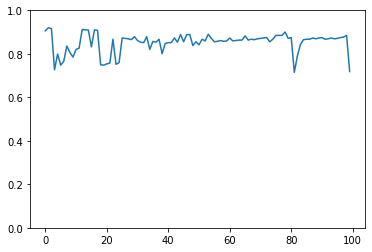

In [ ]:
wt_matrix = perceptron.fit(X_train, y_train, 100) 

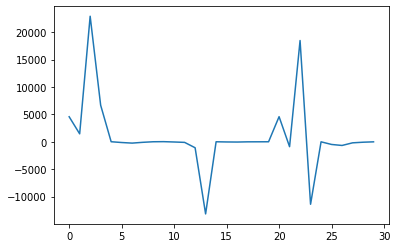

In [ ]:
plt.plot(wt_matrix[-1,:])
plt.show()

In [ ]:
y_pred_train = perceptron.predict(X_train)
accuracy_score(y_pred_train,y_train)

0.919921875

In [ ]:
y_pred_test = perceptron.predict(X_test)
accuracy_score(y_pred_test,y_test)

0.8771929824561403

In [ ]:
%matplotlib inline
from matplotlib import animation, rc
from IPython.display import HTML

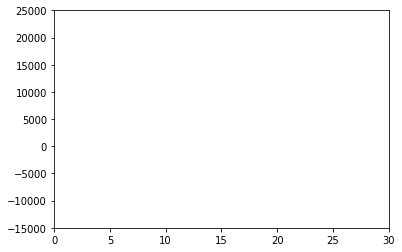

In [ ]:
# First set up the figure, the axis, and the plot element we want to animate
fig, ax = plt.subplots()

# We have got the y limit by plotting the last row of the wt_matrix
ax.set_xlim(( 0, wt_matrix.shape[1]))
ax.set_ylim((-15000,25000))
line, = ax.plot([], [], lw=2)

In [ ]:
# animation function. This is called sequentially
def animate(i):
    x = list(range(wt_matrix.shape[1]))
    y = wt_matrix[i,:]
    line.set_data(x, y)
    return (line,)

In [ ]:
# call the animator. blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate,
                               frames=100, interval=100, blit=True)

In [ ]:
HTML(anim.to_html5_video())